In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

from datetime import datetime

In [4]:
# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 통계 라이브러리 임포트
import scipy.stats as stats

In [5]:
df=pd.read_excel('result_data.xlsx', skiprows=1)
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [7]:
#1. 무형, 보험 상품 및 판매가 0인 프로그램은 제외
df=df[df['상품군']!='무형']

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   20588 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [9]:
# 2. 취급액이 NaN 인경우 0으로 채워주기: 팔리지 않음
#    노출분이 NaN 인경우 ffill로 채워주기: 동일 상품 동일 노출(분)
df['노출(분)'].fillna(method='ffill', inplace=True)

In [10]:
df.fillna(0, inplace=True) #취급액이 NaN 인경우 0으로 채워주기: 팔리지 않음 (NaN인 열은 취급액 열 밖에 없으르모 한번에 채움)

In [11]:
df.info() #모든 결측값 제거 완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


In [12]:
# 3. 주문량 = 취급액/판매단가(열 생성 하기)
df['주문량']=df['취급액']/df['판매단가']

In [13]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045


In [14]:
# 4. 심야 2:00 ~ 6:20 시간대 제외
#    요일 열 새로 생성 0~6 월~일요일, 중 토요일 (18:00~18:20 제외)

df['요일']=df['방송일시'].dt.dayofweek

In [15]:
df.index = df['방송일시']

In [16]:
df[df['요일']==5].between_time('17:00', '18:21') #토요일 18:00~18:20 은 이미 포함되지 않은 상태를 확인

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일
방송일시,,,,,,,,,,
2019-01-05 17:00:00,2019-01-05 17:00:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,52050000.0,1304.511278,5
2019-01-05 17:20:00,2019-01-05 17:20:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,77249000.0,1936.065163,5
2019-01-05 17:40:00,2019-01-05 17:40:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,104552000.0,2620.350877,5
2019-01-05 18:20:00,2019-01-05 18:20:00,20.0,100801,202365,바다먹자 국내산 손질꽃게 7팩,농수축,59900,26816000.0,447.679466,5
2019-01-12 17:00:00,2019-01-12 17:00:00,20.0,100491,201483,피시원 국내산 손질 대구 8팩 * 매운탕 양념 8팩,농수축,59900,22580000.0,376.961603,5
...,...,...,...,...,...,...,...,...,...,...
2019-12-21 17:20:00,2019-12-21 17:20:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,32891000.0,824.335840,5
2019-12-21 17:40:00,2019-12-21 17:40:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,223492000.0,5601.303258,5
2019-12-28 17:00:00,2019-12-28 17:00:00,20.0,100202,201018,임성근의 녹용도가니탕 풀세트,농수축,55900,56234000.0,1005.974955,5


In [17]:
# 심야 2:00 ~ 6:20 시간대 제외
df.between_time('2:00','6:19')

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일
방송일시,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,1
2019-01-01 06:00:00,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,1
2019-01-02 06:00:00,2019-01-02 06:00:00,20.0,100229,200800,벨라홈 논슬립 옷걸이 세트,생활용품,29800,9605000.0,322.315436,2
2019-01-03 06:00:00,2019-01-03 06:00:00,20.0,100781,202292,에펨 여성 미들퍼부츠,잡화,39800,2450000.0,61.557789,3
2019-01-03 06:00:00,2019-01-03 06:00:00,20.0,100781,202285,에펨 남성 미들퍼부츠,잡화,49800,2645000.0,53.112450,3
...,...,...,...,...,...,...,...,...,...,...
2019-12-26 02:00:00,2019-12-26 02:00:00,20.0,100624,201927,안국루테인 미니100(5박스),건강기능,59000,18822000.0,319.016949,3
2019-12-27 02:00:00,2019-12-27 02:00:00,20.0,100312,201006,블랙모어스 알티지 오메가3 3병 (53주분),건강기능,95200,16867000.0,177.174370,4
2019-12-28 02:00:00,2019-12-28 02:00:00,20.0,100841,202484,옛날 그 쥐포 110장 (11팩),농수축,32900,33231000.0,1010.060790,5


In [18]:
df=df.drop(df.between_time('2:00','6:19').index)
df['일시'] = df['방송일시']
df
# 상품군으로 groupby 해서 볼까

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일,일시
방송일시,,,,,,,,,,,
2019-01-01 06:20:00,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,1,2019-01-01 06:20:00
2019-01-01 06:20:00,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,1,2019-01-01 06:20:00
2019-01-01 06:40:00,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,1,2019-01-01 06:40:00
2019-01-01 06:40:00,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,234.010025,1,2019-01-01 06:40:00
2019-01-01 07:00:00,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,115.576271,1,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:00,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,68.628378,1,2019-12-31 23:40:00
2020-01-01 00:00:00,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.117978,2,2020-01-01 00:00:00
2020-01-01 00:00:00,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.380952,2,2020-01-01 00:00:00


In [19]:
df.to_csv('result4Analysis.csv', index=False)

In [20]:
# groupby 상품군으로 분석해보기

In [21]:
#### 날씨 데이터 추가염 ㅎ_ㅎ ####
weather = pd.read_csv("weather_data.csv",encoding='CP949')
weather

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),적설(cm),지면상태(지면상태코드)
0,108,서울,2019-01-01 6:00,-7.9,NaN,1.3,290.0,60.0,NaN,NaN
1,108,서울,2019-01-01 7:00,-7.7,NaN,1.3,320.0,58.0,NaN,NaN
2,108,서울,2019-01-01 8:00,-7.7,NaN,0.9,360.0,57.0,NaN,NaN
3,108,서울,2019-01-01 9:00,-7.0,NaN,0.9,290.0,50.0,NaN,NaN
4,108,서울,2019-01-01 10:00,-4.9,NaN,1.6,290.0,44.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8750,108,서울,2019-12-31 20:00,-7.0,NaN,2.9,290.0,41.0,NaN,NaN
8751,108,서울,2019-12-31 21:00,-7.4,NaN,0.8,20.0,43.0,NaN,NaN
8752,108,서울,2019-12-31 22:00,-8.2,NaN,0.0,0.0,42.0,NaN,NaN
8753,108,서울,2019-12-31 23:00,-7.4,NaN,0.0,0.0,45.0,NaN,NaN


In [22]:
# 타입: object -> datetime 변경
weather['일시'] = pd.to_datetime(weather['일시'])
weather['일시']

0      2019-01-01 06:00:00
1      2019-01-01 07:00:00
2      2019-01-01 08:00:00
3      2019-01-01 09:00:00
4      2019-01-01 10:00:00
               ...        
8750   2019-12-31 20:00:00
8751   2019-12-31 21:00:00
8752   2019-12-31 22:00:00
8753   2019-12-31 23:00:00
8754   2020-01-01 00:00:00
Name: 일시, Length: 8755, dtype: datetime64[ns]

In [23]:
# 필요 없는 컬럼 제거
weather = weather.drop('지점',axis = 1)
weather = weather.drop('지점명',axis = 1)
weather = weather.drop('지면상태(지면상태코드)',axis = 1)

In [24]:
# nan을 0으로 변경 (목적: 추후 merge 후 nan으로 있으면 안되니까)
weather = weather.replace(np.nan, '0')

In [25]:
# df와 weather merge / 일시를 기준으로 / outer로 하여 합집합 개념으로 진행.
df_new = pd.merge(df,weather, on='일시', how='outer')

In [26]:
# 아래에서 위로 채우기 bfill -> nan 데이터 제거 dropna -> '일시' 컬럼 제거
df_new = df_new.fillna(method = 'bfill')
df_new = df_new.dropna()
df_new = df_new.drop('일시',axis = 1)

In [27]:
# df와 df_new의 shape이 같음을 확인.
print(df.shape)
print(df_new.head())


(36899, 11)
                 방송일시  노출(분)      마더코드      상품코드               상품명 상품군  \
0 2019-01-01 06:20:00   20.0  100346.0  201072.0     테이트 남성 셀린니트3종  의류   
1 2019-01-01 06:20:00   20.0  100346.0  201079.0     테이트 여성 셀린니트3종  의류   
2 2019-01-01 06:40:00   20.0  100346.0  201072.0     테이트 남성 셀린니트3종  의류   
3 2019-01-01 06:40:00   20.0  100346.0  201079.0     테이트 여성 셀린니트3종  의류   
4 2019-01-01 07:00:00   20.0  100305.0  200974.0  오모떼 레이스 파운데이션 브라  속옷   

      판매단가        취급액         주문량   요일  기온(°C) 강수량(mm) 풍속(m/s) 풍향(16방위)  \
0  39900.0  3262000.0   81.754386  1.0    -7.7       0     1.3      320   
1  39900.0  6955000.0  174.310777  1.0    -7.7       0     1.3      320   
2  39900.0  6672000.0  167.218045  1.0    -7.7       0     1.3      320   
3  39900.0  9337000.0  234.010025  1.0    -7.7       0     1.3      320   
4  59000.0  6819000.0  115.576271  1.0    -7.7       0     1.3      320   

   습도(%) 적설(cm)  
0   58.0      0  
1   58.0      0  
2   58.0      0  
3   58.0      0  
4 

In [28]:
df_new.corr()

,노출(분),마더코드,상품코드,판매단가,취급액,주문량,요일,기온(°C),습도(%)
노출(분),1.000000,0.094999,0.086022,0.147808,0.026321,-0.064054,-0.007324,0.027973,0.000133
마더코드,0.094999,1.000000,0.978881,-0.214975,-0.028782,0.012116,-0.038249,-0.095006,-0.036513
상품코드,0.086022,0.978881,1.000000,-0.227482,-0.015380,0.023031,-0.038538,-0.113018,-0.041606
판매단가,0.147808,-0.214975,-0.227482,1.000000,-0.253608,-0.383704,0.070732,0.010468,0.056550
취급액,0.026321,-0.028782,-0.015380,-0.253608,1.000000,0.769884,0.055887,-0.003342,-0.064444
주문량,-0.064054,0.012116,0.023031,-0.383704,0.769884,1.000000,0.016090,0.037455,-0.072253
요일,-0.007324,-0.038249,-0.038538,0.070732,0.055887,0.016090,1.000000,0.015719,-0.023083
기온(°C),0.027973,-0.095006,-0.113018,0.010468,-0.003342,0.037455,0.015719,1.000000,0.161593
습도(%),0.000133,-0.036513,-0.041606,0.056550,-0.064444,-0.072253,-0.023083,0.161593,1.000000


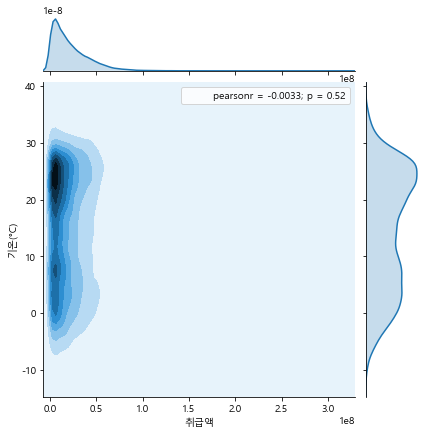

In [29]:
fig=sns.jointplot(df_new['취급액'],df_new['기온(°C)'], kind='kde')
fig.annotate(stats.pearsonr)
# 상관관계 너무 구림.
# p -> 0.05가 나와야 의미있음 -> 100번 중 95번이 같은 경과 나옴

In [30]:
from datetime import date, datetime
 
MON, TUE, WED, THU, FRI, SAT, SUN = range(7)
 
class holiday2019():
    HOLIDAYS = ((1,1), # new Year
                (2,4), # new Year0
                (2,5), # new Year1
                (2,6), # new Year2
                (3,1), # 3.1
                (5,5), # Children's Day
                (5,5), # Make up Holiday
                (5,12), # Buddha Day
                (6,6), # Memorial Day
                (8,15), # Liberation Day
                (9,12), # Thanksgiving0
                (9,13), # Thanksgiving1
                (9,14), # Thanksgiving2
                (10,3), # National Foundation Day
                (10,9), # Hangul Day
                (12,25) # Christmas
                )
 
    def is_holiday(self, daytuple):
        HOLIDAYS = self.HOLIDAYS
        if daytuple in HOLIDAYS:
            return True
        else:
            return False


In [31]:
l = []
if __name__=='__main__':
    for i in df_new['방송일시']:
        now = i
        daytuple = ((now.month),(now.day))
        nowholiday = holiday2019()
        print(daytuple, nowholiday.is_holiday(daytuple))
        l.append(nowholiday.is_holiday(daytuple))

(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 1) True
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1, 2) False
(1,

(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12) False
(1, 12

(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21) False
(1, 21

(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(1, 31) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2, 1) False
(2

(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 8) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False
(2, 9) False

(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 17) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18) False
(2, 18

(2, 26) False
(2, 26) False
(2, 26) False
(2, 26) False
(2, 26) False
(2, 26) False
(2, 26) False
(2, 26) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27) False
(2, 27

(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False
(3, 8) False

(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 16) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17) False
(3, 17

(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 26) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27) False
(3, 27

(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 5) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False
(4, 6) False

(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 12) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13) False
(4, 13

(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23) False
(4, 23

(5, 1) False
(5, 1) False
(5, 1) False
(5, 1) False
(5, 1) False
(5, 1) False
(5, 1) False
(5, 1) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False
(5, 2) False

(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 9) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 10) False
(5, 

(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16) False
(5, 16

(5, 26) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27) False
(5, 27

(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 6) True
(6, 

(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15) False
(6, 15

(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 24) False
(6, 25) False
(6, 25) False
(6, 25) False
(6, 25) False
(6, 25

(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False
(7, 5) False

(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 13) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14) False
(7, 14

(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22) False
(7, 22

(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30) False
(7, 30

(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False
(8, 8) False

(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 18) False
(8, 19) False
(8, 19) False
(8, 19) False
(8, 19) False
(8, 19) False
(8, 19

(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 27) False
(8, 28) False
(8, 28) False
(8, 28) False
(8, 28) False
(8, 28) False
(8, 28) False
(8, 28

(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 7) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False
(9, 8) False

(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 18) False
(9, 19) False
(9, 19) False
(9, 19) False
(9, 19

(9, 27) False
(9, 27) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28) False
(9, 28

(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5) False
(10, 5

(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 14) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) False
(10, 15) F

(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 23) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) False
(10, 24) F

(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5) False
(11, 5

(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) False
(11, 16) F

(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 27) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) False
(11, 28) F

(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 7) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8) False
(12, 8

(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) False
(12, 15) F

(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 25) True
(12, 2

In [32]:
holiday = pd.Series(l).astype(int)

In [33]:
df_new['휴일'] = holiday

In [34]:
df_new

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),적설(cm),휴일
0,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,81.754386,1.0,-7.7,0,1.3,320,58.0,0,1
1,2019-01-01 06:20:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,174.310777,1.0,-7.7,0,1.3,320,58.0,0,1
2,2019-01-01 06:40:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,167.218045,1.0,-7.7,0,1.3,320,58.0,0,1
3,2019-01-01 06:40:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,9337000.0,234.010025,1.0,-7.7,0,1.3,320,58.0,0,1
4,2019-01-01 07:00:00,20.0,100305.0,200974.0,오모떼 레이스 파운데이션 브라,속옷,59000.0,6819000.0,115.576271,1.0,-7.7,0,1.3,320,58.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36894,2019-12-31 23:40:00,20.0,100448.0,201391.0,일시불쿠첸압력밥솥 6인용,주방,148000.0,10157000.0,68.628378,1.0,-6.5,0,0,0,38.0,0,0
36895,2020-01-01 00:00:00,20.0,100448.0,201383.0,무이자쿠첸압력밥솥 10인용,주방,178000.0,50929000.0,286.117978,2.0,-6.5,0,0,0,38.0,0,1
36896,2020-01-01 00:00:00,20.0,100448.0,201390.0,일시불쿠첸압력밥솥 10인용,주방,168000.0,104392000.0,621.380952,2.0,-6.5,0,0,0,38.0,0,1
36897,2020-01-01 00:00:00,20.0,100448.0,201384.0,무이자쿠첸압력밥솥 6인용,주방,158000.0,13765000.0,87.120253,2.0,-6.5,0,0,0,38.0,0,1


In [35]:
list2 = []
for i in df_new['방송일시']:
    list2.append(i.weekday())
weekday = pd.Series(list2)

In [36]:
df_new['요일'] = weekday

In [37]:
df_new

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),적설(cm),휴일
0,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,81.754386,1,-7.7,0,1.3,320,58.0,0,1
1,2019-01-01 06:20:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,174.310777,1,-7.7,0,1.3,320,58.0,0,1
2,2019-01-01 06:40:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,167.218045,1,-7.7,0,1.3,320,58.0,0,1
3,2019-01-01 06:40:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,9337000.0,234.010025,1,-7.7,0,1.3,320,58.0,0,1
4,2019-01-01 07:00:00,20.0,100305.0,200974.0,오모떼 레이스 파운데이션 브라,속옷,59000.0,6819000.0,115.576271,1,-7.7,0,1.3,320,58.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36894,2019-12-31 23:40:00,20.0,100448.0,201391.0,일시불쿠첸압력밥솥 6인용,주방,148000.0,10157000.0,68.628378,1,-6.5,0,0,0,38.0,0,0
36895,2020-01-01 00:00:00,20.0,100448.0,201383.0,무이자쿠첸압력밥솥 10인용,주방,178000.0,50929000.0,286.117978,2,-6.5,0,0,0,38.0,0,1
36896,2020-01-01 00:00:00,20.0,100448.0,201390.0,일시불쿠첸압력밥솥 10인용,주방,168000.0,104392000.0,621.380952,2,-6.5,0,0,0,38.0,0,1
36897,2020-01-01 00:00:00,20.0,100448.0,201384.0,무이자쿠첸압력밥솥 6인용,주방,158000.0,13765000.0,87.120253,2,-6.5,0,0,0,38.0,0,1
